# Homework 3

### By James Kinney and Franklin Marsh

MATH0154
with Prof. 😁Gabe Chandler😁 

First, we need to generate $x_{0}$ which is the initial sequence of numbers $[1,2,3...,m]$. The following function generates $x_{0}$ for arbitrary $m$.

In [8]:
GenX0 <- function(m = NULL, initialPerm = NULL) {
    #
    # Function to generate the sequence of the first m positive integers [1,2,3...m]
    #
    # Args:
    #    m: integer length of the sequence
    #    initialPerm: a vector of numbers to be sorted
    # Returns:
    #     x0: sequence integers: [1,2,3...m]
    
    
    # The input should be either an inital permutation of an m
    # If both are given, the m will be used
    if (!is.null(m)){
        return(c(1:m))
    }
    # If m is null, sort the initial vector into increasing order
    else {
        return (sort(initialPerm, decreasing = FALSE))
    }
}


In [9]:
ex_sequence <- GenX0(7) #example sequence
print(ex_sequence) #print the example sequence

[1] 1 2 3 4 5 6 7


To generate a list of vectors that could possibly be neighbors, we need to swap two elements in the initial vector $x_{0}$. For this, we will write a swap function.

In [10]:
Swap <- function (x, i, j) {
    #
    # Function to swap two elements (i,j) in an input vector x.
    #
    # Args:
    #    x: sequence on which to perform the swap.
    #    i: index less than length(x)
    #    j: index less than length(x)
    # Returns:
    #     x_swap: new vector with indices i and j swapped.
    
    tempI <- x[i] # Save the ith element
    x[i] <- x[j] # Change the ith element to the jth element
    x[j] <- tempI # Change the jth element to the ith element
    return (x) # Return the new vector
}


In [11]:
ex_swap <- Swap(ex_sequence, 2, 4) #swap the 2nd element with the 4th element.
print(ex_swap) #print the sequence with the 2nd element and the 4th element swapped.

[1] 1 4 3 2 5 6 7


We will now write a function to generate all of the possible two-element swaps in a vector.

In [12]:
GenSwaps <- function(x) {
    # Input is a vector of the permutation in order
    # Initialize empty matrix to hold all possible permutations with 1 swap
    # 1 row = 1 Permutation
    # A function which generates all m choose 2 possibles 2 elements swaps from a permutation
    # 
  output <- matrix(data = NA, nrow = sum((1:length(x))) - (length(x) - 2), ncol = length(x)) #initialize an empty matrix
  index <- 1 #start the looping index at 1
  # Loop through each element and generate the swaps with all the elements after it
  for (i in (1:length(x))) { #for each element in the input vector
    for (j in ((i+1):length(x)-1)) { #for each element in the input vector greater than i
      output[index,] <- Swap(x, i, j) # Add a possible swap to the output matrix.
      index <- index + 1 #increase the index by one to move to store the next permutation.
    }
  }
  return(unique(output)) #remove duplicate rows from the output matrix and return it.
}

In [13]:
ex_gen_swaps <- GenSwaps(GenX0(10))
print(ex_gen_swaps)

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,]    1    2    3    4    5    6    7    8    9    10
 [2,]    2    1    3    4    5    6    7    8    9    10
 [3,]    3    2    1    4    5    6    7    8    9    10
 [4,]    4    2    3    1    5    6    7    8    9    10
 [5,]    5    2    3    4    1    6    7    8    9    10
 [6,]    6    2    3    4    5    1    7    8    9    10
 [7,]    7    2    3    4    5    6    1    8    9    10
 [8,]    8    2    3    4    5    6    7    1    9    10
 [9,]    9    2    3    4    5    6    7    8    1    10
[10,]    1    3    2    4    5    6    7    8    9    10
[11,]    1    4    3    2    5    6    7    8    9    10
[12,]    1    5    3    4    2    6    7    8    9    10
[13,]    1    6    3    4    5    2    7    8    9    10
[14,]    1    7    3    4    5    6    2    8    9    10
[15,]    1    8    3    4    5    6    7    2    9    10
[16,]    1    9    3    4    5    6    7    8    2    10
[17,]    1    2    4    3    5 

We will need to find the size of every possible swap created by GenSwaps. The size of a vector $V$ is defined as: $\sum_{i}^{m}i \times V_{i}$, where $m$ is the length of the vector $V$.

In [14]:
FindSize <- function(x) {
    #
    # Function to check the size of a permutation
    #
    # Args:
    #    x: permutation to find the size of
    # Returns:
    #    size: size of the permutation, as defined: $\sum_{i}^{m}i \times V_{i}$
 
  sizes <- c()   # Input is a vector of the permutation in order
  for (j in (1:length(x))) {   # Loop through each index of the permutation and multiply by the index
    sizes[j] <- x[j]*j     # Store these values in a vector
  }
  return(sum(sizes))   # Return the sum of the vector of products
}

We see that the two vectors that we previously generated have different size.

In [15]:
print(FindSize(ex_sequence))
print(FindSize(ex_swap))

[1] 140
[1] 136


Using our recently-built size function, and our list of possible swaps, we need to determine two things. First, we need to determine which permutations are actually neighbors (having size > k). Then we need to determine the length of this list of neighbors. We will write two separate functions to do this.

In [16]:
NeighborMatrix <- function(swap_matrix, k) {
    
    sizes <- apply(swap_matrix, 1, FindSize) #apply findsize function across the rows 
    
    return(swap_matrix[as.logical(sizes > k),]) #return a matrix with only the neighbors as rows.
}

NumberGreaterThanK <- function(swap_matrix, k) {
    
    sizes <- apply(swap_matrix, 1, FindSize) #apply findsize function across the rows 
    
    return(length(sizes[as.logical(sizes > k)])) #return the number of neighbors
}

For example, we can use our example generated swaps and k = 380 to find the number of neighbors:

In [17]:
print(NumberGreaterThanK(ex_gen_swaps, 380))

[1] 17


In this next line, we demonstrate the function which selects only the neighbors from the list of possible two-swaps:

In [18]:
neighbor_matrix <- NeighborMatrix(ex_gen_swaps, 380)
print(neighbor_matrix)

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,]    1    2    3    4    5    6    7    8    9    10
 [2,]    2    1    3    4    5    6    7    8    9    10
 [3,]    3    2    1    4    5    6    7    8    9    10
 [4,]    1    3    2    4    5    6    7    8    9    10
 [5,]    1    4    3    2    5    6    7    8    9    10
 [6,]    1    2    4    3    5    6    7    8    9    10
 [7,]    1    2    5    4    3    6    7    8    9    10
 [8,]    1    2    3    5    4    6    7    8    9    10
 [9,]    1    2    3    6    5    4    7    8    9    10
[10,]    1    2    3    4    6    5    7    8    9    10
[11,]    1    2    3    4    7    6    5    8    9    10
[12,]    1    2    3    4    5    7    6    8    9    10
[13,]    1    2    3    4    5    8    7    6    9    10
[14,]    1    2    3    4    5    6    8    7    9    10
[15,]    1    2    3    4    5    6    9    8    7    10
[16,]    1    2    3    4    5    6    7    9    8    10
[17,]    1    2    3    4    5 

Out of a vector of neighbors, we need to pick one at random. This is our candidate permutation, which we might move to in the next Markov Chain step.

In [19]:
RandomNeighbor <- function (neighbors) {
    # A function to pick a random neighbor
    # Input is a vector of the neighbors
    index <- sample((1:nrow(neighbors)),1) #pick a random row number from the neighbors matrix
    return (neighbors[index,]) #return the row corresponding to the randomly selected index.
}

For example:

In [20]:
RandomNeighbor(neighbor_matrix) #pick an example random neighbor

[1]  1  2  3  4  6  5  7  8  9 10

In order for the MCMC to run for a long time, we want to bias the algorithm to move towards states with fewer neighbors. We need to count the number of neighbors of a beginning state X and and ending state Y and compare them. Then we will draw a random uniform and compare it to the ratio of (nX/nY). If $u < \frac{nX}{nY}$, we will move to the candidate state. If not, we will stay where we are and try to move to another neighbor in the same manner.

In [21]:
ChangeCheck <- function (nX, nY) {
  # A function which returns TRUE if the algorithm says to switch and FALSE if not
  # Inputs are n(x) and n(y) - the number of neighbors of the start x and the
  # proposed neighbor to switch to y
  # If n(x) is greater than n(Y) always switch
  if (nX >= nY) {
    return (TRUE)
  }
  # Otherwise switch with probability n(x)/n(y)
  else {
    # Create a unif between 0 and 1 and if it is less than n(x)/n(y) switch
    p <- nX/nY
    u <- runif(1, 0, 1)
    if (u <= p) {
      return (TRUE)
    }
    else {
      return (FALSE)
    }
  }
}

This next Step function perforsm the bulk of the MCMC. It puts together what we have previously written. It takes in an input vector, and finds all the neighbors of that input vector. It then performs a two-swap to produce a candidate vector. It then finds all of the neighbors of the candidate vector. It then decides whether to move to the candidate vector by comparing the number of neighbors with the number of neighbors of the input vector. It returns a vector that is the next vector in the MCMC chain.

In [22]:
Step <- function(x,k) {
    
    x_swaps <- GenSwaps(x) #generate the possible swaps for the first vector
    neighbors <- NeighborMatrix(x_swaps, k) #find the swaps that are neighbors
    y <- RandomNeighbor(neighbors) #pick a random swap
    y_swaps <- GenSwaps(y) #generate the possible for swaps for the candidate vector.
    nX <- NumberGreaterThanK(x_swaps, k) #calculate the number of neighbors of the first vector.
    nY <- NumberGreaterThanK(y_swaps, k) #calculate the number of neighbors of the candidate vector.
    change_bool <- ChangeCheck(nX,nY) #decide whether to move to the candidate vector.
    
    if (change_bool == TRUE) {
        return(y)
    }

    else if (change_bool == FALSE) {
        return(x)
    }
}

This next function does a lot of MCMC steps, recording the vector of each step in a list, and then returning us that list.

In [23]:
MCMC <- function(m,k,n_iters) {
    #
    # Args:
    #    m: the length of the initial x0 vector [1,2,3...m]
    #    k: the minimum size for a 'big' permutation.
    #    n_iters: number of MCMC iterations that is desired.
    # Returns:
    #    out: list of states that the MCMC has visited.
    
    x0 <- list(GenX0(m)) #generate the first vector

    for (i in (1:n_iters + 1)) { #for each iteration
        x0[[i]] <- Step(x0[[i-1]],k) #perform an MCMC step and record the outcome
    }
    return(t(simplify2array(x0)))
}

In [24]:
test_MCMC <- MCMC(10,350,1000) #run the MCMC and store the list of states in a variable

In [26]:
test_sizes <- apply(test_MCMC, 1, FindSize) # loop through the rows (permutations) and record the sizes 

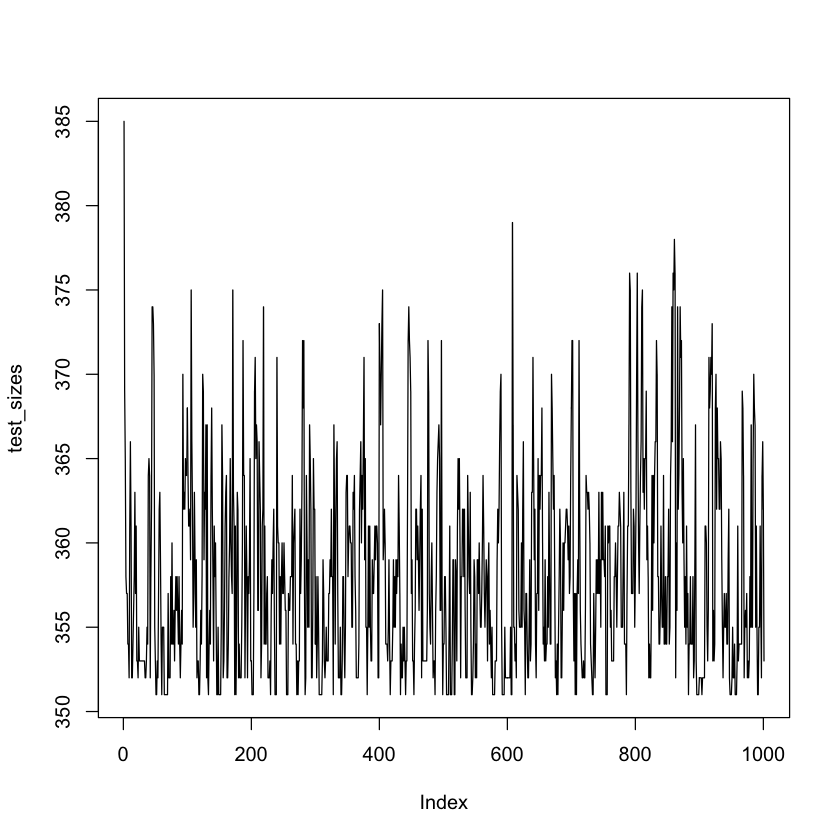

In [27]:
plot(test_sizes, type = 'l') #plot size as a function of MCMC iteration

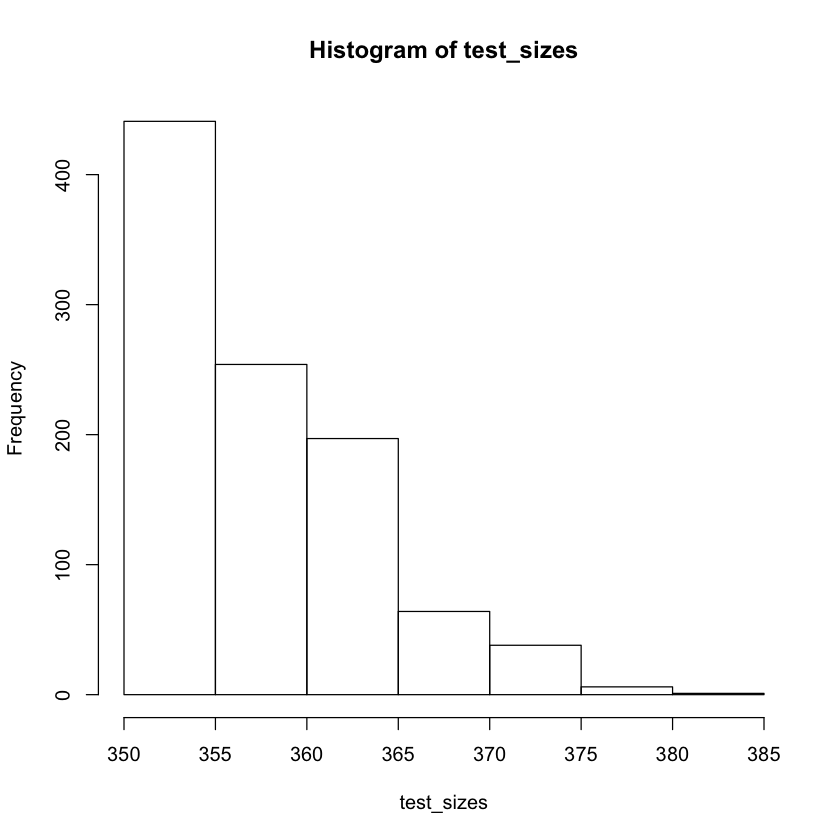

In [29]:
hist(test_sizes) #examine the distribution of sizes in the MCMC iteration list

In [30]:
print(mean(test_sizes)) #compute the average size of a "big" permutation

[1] 357.985


There we have it, folks!  👏 🙌 🍻 